# Interactive plot with Plotly

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg" # this line must be commented if working on colab

In [3]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


## Advanced visualizations with plotly.graph_objects

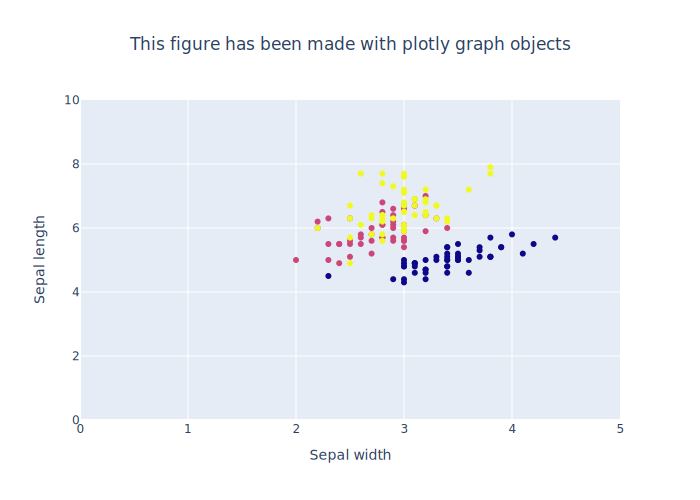

In [8]:
fig = go.Figure(
    data = go.Scatter(
        x = df.sepal_width,
        y = df.sepal_length,
        mode = "markers",
        marker= go.scatter.Marker(color=df.species_id)
    ),
    layout = go.Layout(
        title = go.layout.Title(text="This figure has been made with plotly graph objects", x=0.5),
        xaxis = go.layout.XAxis(title="Sepal width", range=[0,5]),
        yaxis = go.layout.YAxis(title="Sepal length", range=[0,10])
    )
)

fig.show()

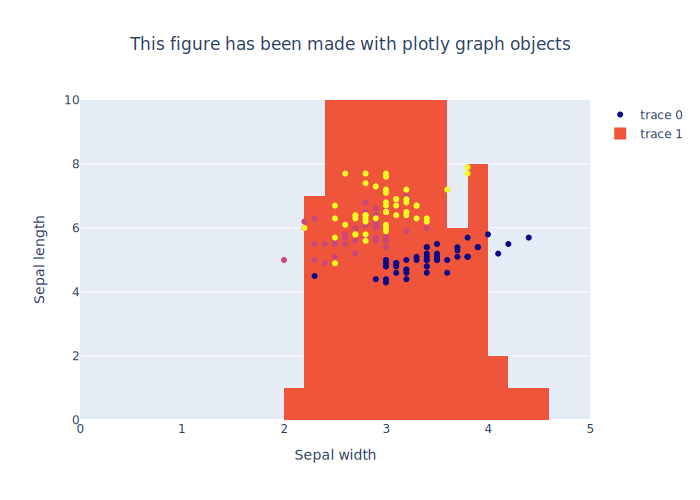

In [9]:
# Add the distribution of sepal_width on the same graph
fig.add_trace(
    go.Histogram(
        x = df['sepal_width']))

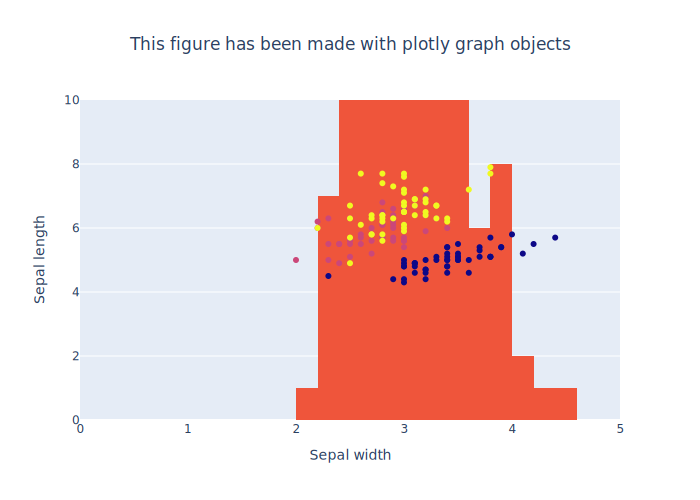

In [10]:
# Hide the legend
fig.update_layout(showlegend=False)

## Creating subplots

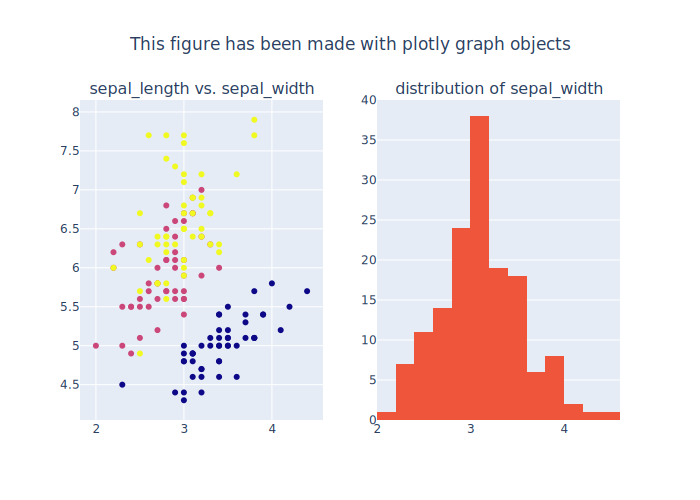

In [11]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("sepal_length vs. sepal_width", "distribution of sepal_width"))

fig.add_trace(
    go.Scatter(
        x = df['sepal_width'],
        y = df['sepal_length'],
        mode = 'markers',
        marker = go.scatter.Marker(color = df['species_id'])),
        row = 1,
        col = 1
)

fig.add_trace(
    go.Histogram(
        x = df['sepal_width']),
        row = 1,
        col = 2)

fig.update_layout(
        title = go.layout.Title(text = "This figure has been made with plotly graph objects", x = 0.5),
        showlegend = False)

## Adding some interactivity

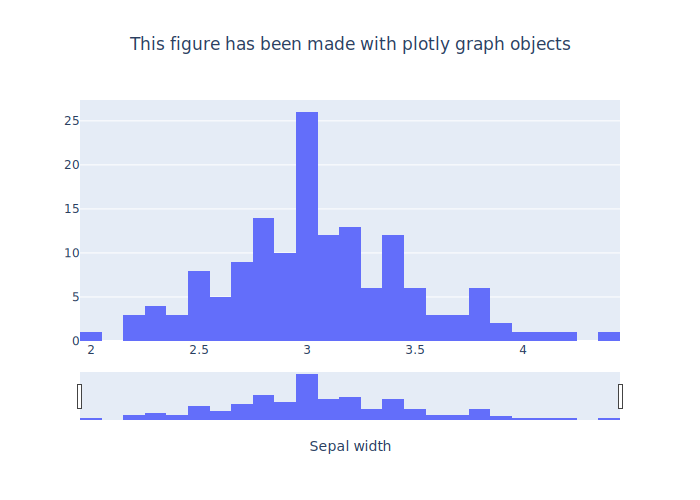

In [12]:
fig = go.Figure(
    data = go.Histogram(
        x = df['sepal_width'],
        nbinsx = 40),
    layout = go.Layout(
        title = go.layout.Title(text = "This figure has been made with plotly graph objects", x = 0.5),
        xaxis = go.layout.XAxis(title = 'Sepal width', rangeslider = go.layout.xaxis.Rangeslider(visible = True))
    )
)

fig.show()

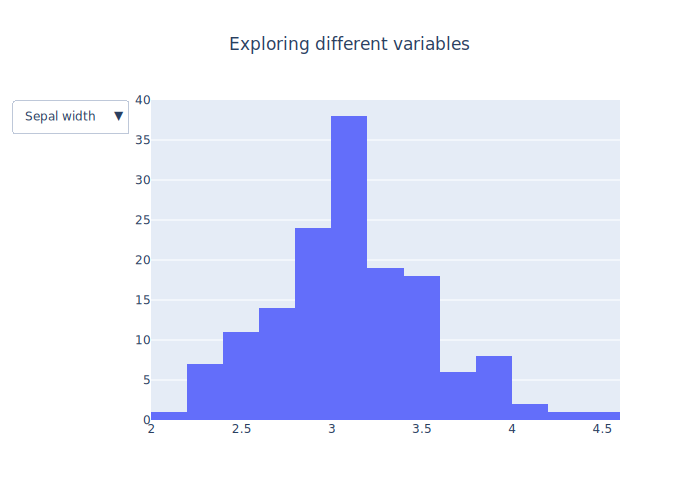

In [13]:
# Example of how to allow the selection of a type of a variable
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x = df['sepal_width']))

fig.add_trace(
    go.Histogram(
        x = df['sepal_length'],
        visible = False))

fig.add_trace(
    go.Histogram(
        x = df['petal_width'],
        visible = False))

fig.add_trace(
    go.Histogram(
        x = df['petal_length'],
        visible = False))


fig.update_layout(
        title = go.layout.Title(text = "Exploring different variables", x = 0.5),
        showlegend = False)

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Sepal width",
                        method = "update",
                        args = [{"visible" : [True, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Sepal length",
                            method = "update",
                            args = [{"visible" : [False, True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Petal width",
                            method = "update",
                            args = [{"visible" : [False, False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Petal length",
                            method = "update",
                            args = [{"visible" : [False, False, False, True]}])
                ]
    )]
)

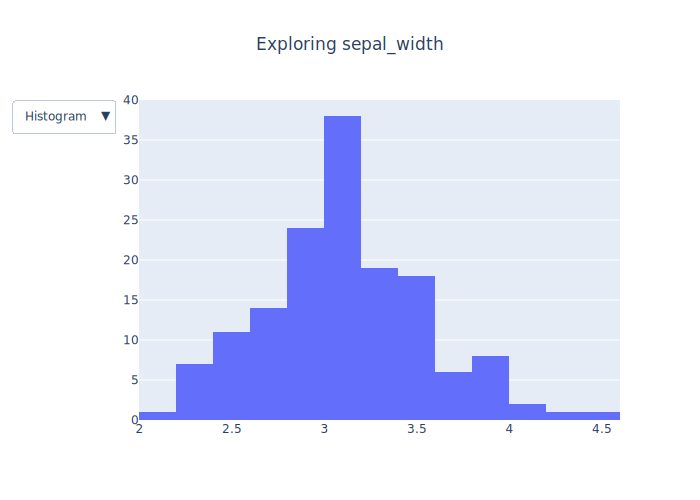

In [14]:
# Example of how to allow the selection of a type of visualisation
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x = df['sepal_width']))

fig.add_trace(
    go.Box(
        x = df['sepal_width'],
        visible = False))

fig.add_trace(
    go.Violin(
        x = df['sepal_width'],
        visible = False))

fig.update_layout(
        title = go.layout.Title(text = "Exploring sepal_width", x = 0.5),
        showlegend = False)

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Histogram",
                        method = "update",
                        args = [{"visible" : [True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Box plot",
                            method = "update",
                            args = [{"visible" : [False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Violin plot",
                            method = "update",
                            args = [{"visible" : [False, False, True]}])
                ]
    )]
)